### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación



#### En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [3]:
# Calcular ingreso total de cada tienda
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

# Mostrar resultados
print(f"Ingreso Tienda 1: ${ingreso_tienda1:,.2f}")
print(f"Ingreso Tienda 2: ${ingreso_tienda2:,.2f}")
print(f"Ingreso Tienda 3: ${ingreso_tienda3:,.2f}")
print(f"Ingreso Tienda 4: ${ingreso_tienda4:,.2f}")

# Crear un resumen en un DataFrame
ingresos_totales = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso Total': [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
})

# print("\nResumen de Ingresos:")
# print(ingresos_totales)

Ingreso Tienda 1: $1,150,880,400.00
Ingreso Tienda 2: $1,116,343,500.00
Ingreso Tienda 3: $1,098,019,600.00
Ingreso Tienda 4: $1,038,375,700.00


# 2. Ventas por categoría

#### En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [4]:
# Calcular ventas por categoría en cada tienda (Top 5)
ventas_categoria_tienda1 = tienda['Categoría del Producto'].value_counts().sort_values(ascending=False).head(5)
ventas_categoria_tienda2 = tienda2['Categoría del Producto'].value_counts().sort_values(ascending=False).head(5)
ventas_categoria_tienda3 = tienda3['Categoría del Producto'].value_counts().sort_values(ascending=False).head(5)
ventas_categoria_tienda4 = tienda4['Categoría del Producto'].value_counts().sort_values(ascending=False).head(5)

# Mostrar resultados
print("=== TOP 5 CATEGORÍAS MÁS POPULARES ===\n")
print("Tienda 1:")
print(ventas_categoria_tienda1)
print("\nTienda 2:")
print(ventas_categoria_tienda2)
print("\nTienda 3:")
print(ventas_categoria_tienda3)
print("\nTienda 4:")
print(ventas_categoria_tienda4)

# Crear un resumen comparativo
resumen_categorias = pd.DataFrame({
    'Tienda 1': ventas_categoria_tienda1,
    'Tienda 2': ventas_categoria_tienda2,
    'Tienda 3': ventas_categoria_tienda3,
    'Tienda 4': ventas_categoria_tienda4
}).fillna(0).astype(int)

print("\n=== RESUMEN COMPARATIVO TOP 5 ===")
print(resumen_categorias)

=== TOP 5 CATEGORÍAS MÁS POPULARES ===

Tienda 1:
Categoría del Producto
Muebles                 465
Electrónicos            448
Juguetes                324
Electrodomésticos       312
Deportes y diversión    284
Name: count, dtype: int64

Tienda 2:
Categoría del Producto
Muebles                 442
Electrónicos            422
Juguetes                313
Electrodomésticos       305
Deportes y diversión    275
Name: count, dtype: int64

Tienda 3:
Categoría del Producto
Muebles                 499
Electrónicos            451
Juguetes                315
Electrodomésticos       278
Deportes y diversión    277
Name: count, dtype: int64

Tienda 4:
Categoría del Producto
Muebles                 480
Electrónicos            451
Juguetes                338
Deportes y diversión    277
Electrodomésticos       254
Name: count, dtype: int64

=== RESUMEN COMPARATIVO TOP 5 ===
                        Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categoría del Producto                                        


# 3. Calificación promedio de la tienda


#### En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [5]:
# Calcular calificación promedio por tienda
calificacion_promedio_tienda1 = tienda['Calificación'].mean()
calificacion_promedio_tienda2 = tienda2['Calificación'].mean()
calificacion_promedio_tienda3 = tienda3['Calificación'].mean()
calificacion_promedio_tienda4 = tienda4['Calificación'].mean()

# Mostrar resultados
print("=== CALIFICACIÓN PROMEDIO DE CLIENTES ===\n")
print(f"Tienda 1: {calificacion_promedio_tienda1:.2f}/5.0")
print(f"Tienda 2: {calificacion_promedio_tienda2:.2f}/5.0")
print(f"Tienda 3: {calificacion_promedio_tienda3:.2f}/5.0")
print(f"Tienda 4: {calificacion_promedio_tienda4:.2f}/5.0")

# Crear un resumen en DataFrame
resumen_calificaciones = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Calificación Promedio': [calificacion_promedio_tienda1, calificacion_promedio_tienda2, 
                               calificacion_promedio_tienda3, calificacion_promedio_tienda4]
})

print("\n=== RESUMEN DE SATISFACCIÓN ===")
print(resumen_calificaciones.to_string(index=False))

=== CALIFICACIÓN PROMEDIO DE CLIENTES ===

Tienda 1: 3.98/5.0
Tienda 2: 4.04/5.0
Tienda 3: 4.05/5.0
Tienda 4: 4.00/5.0

=== RESUMEN DE SATISFACCIÓN ===
  Tienda  Calificación Promedio
Tienda 1               3.976685
Tienda 2               4.037304
Tienda 3               4.048326
Tienda 4               3.995759


# 4. Productos más y menos vendidos

#### En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.


=== TIENDA 1 ===

Top 5 Productos Más Vendidos:
Producto
TV LED UHD 4K              60
Armario                    60
Microondas                 60
Secadora de ropa           58
Bloques de construcción    56
Name: count, dtype: int64

Top 5 Productos Menos Vendidos:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64

=== TIENDA 2 ===

Top 5 Productos Más Vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

Top 5 Productos Menos Vendidos:
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

=== TIENDA 3 ===

Top 5 Productos Más Vendidos:
Producto
Kit de bancas      57
Cama king          56
Mesa

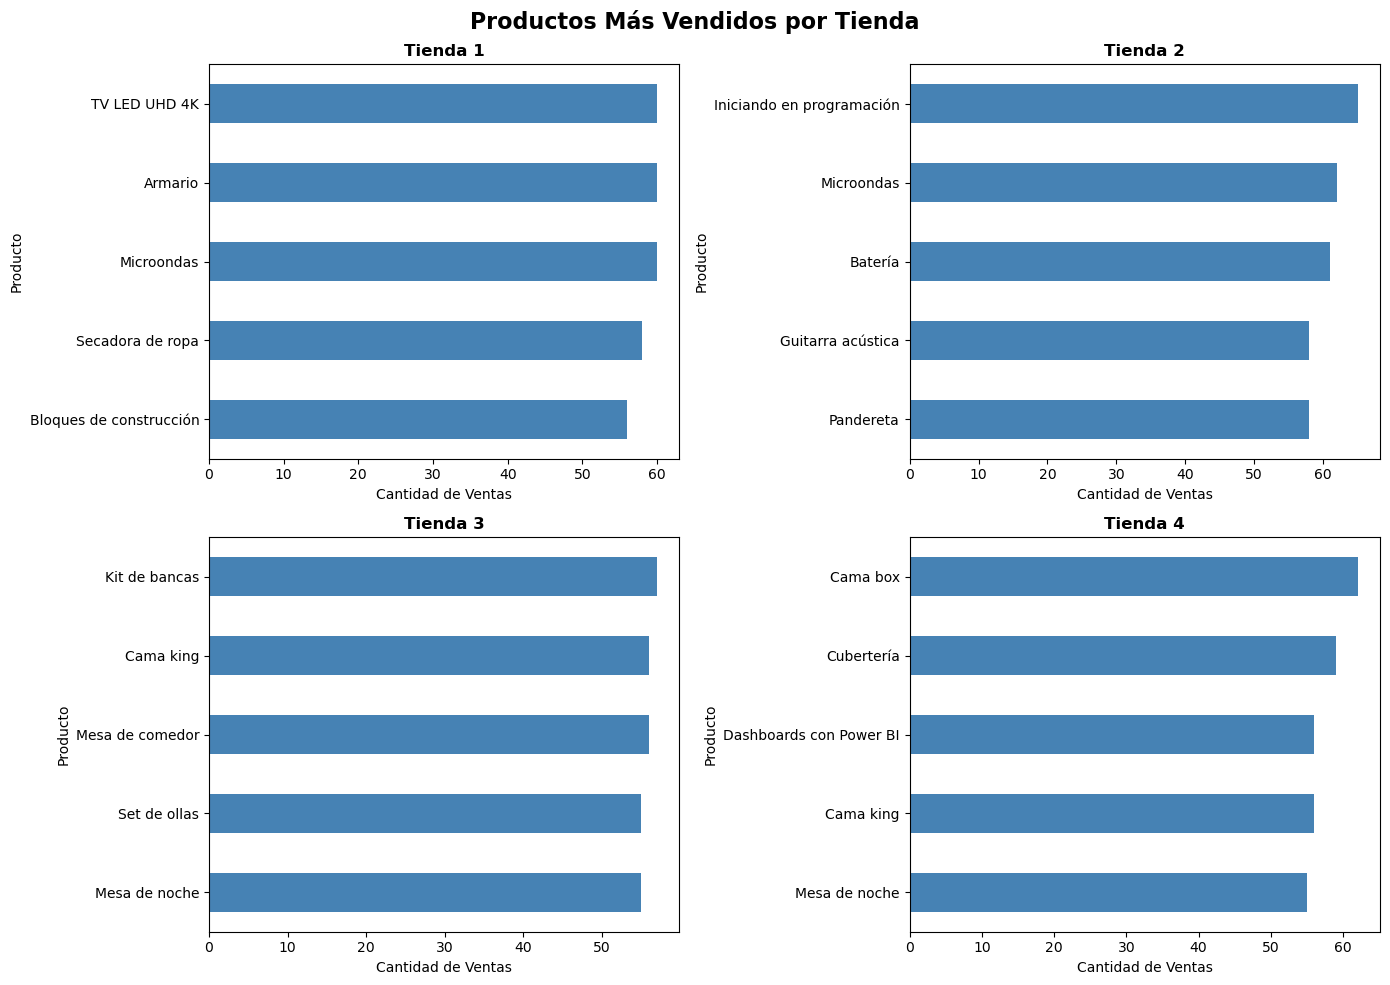

In [6]:
import matplotlib.pyplot as plt

# Función para obtener productos más y menos vendidos
def analizar_productos(tienda_df, nombre_tienda):
    productos_vendidos = tienda_df['Producto'].value_counts()
    
    mas_vendidos = productos_vendidos.head(5)
    menos_vendidos = productos_vendidos.tail(5)
    
    print(f"\n=== {nombre_tienda.upper()} ===")
    print(f"\nTop 5 Productos Más Vendidos:")
    print(mas_vendidos)
    print(f"\nTop 5 Productos Menos Vendidos:")
    print(menos_vendidos)
    
    return mas_vendidos, menos_vendidos

# Analizar todas las tiendas
mas_vendidos_t1, menos_vendidos_t1 = analizar_productos(tienda, "Tienda 1")
mas_vendidos_t2, menos_vendidos_t2 = analizar_productos(tienda2, "Tienda 2")
mas_vendidos_t3, menos_vendidos_t3 = analizar_productos(tienda3, "Tienda 3")
mas_vendidos_t4, menos_vendidos_t4 = analizar_productos(tienda4, "Tienda 4")

# Visualización
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Productos Más Vendidos por Tienda', fontsize=16, fontweight='bold')

tiendas = [
    (mas_vendidos_t1, "Tienda 1", axes[0, 0]),
    (mas_vendidos_t2, "Tienda 2", axes[0, 1]),
    (mas_vendidos_t3, "Tienda 3", axes[1, 0]),
    (mas_vendidos_t4, "Tienda 4", axes[1, 1])
]

for productos, nombre, ax in tiendas:
    productos.plot(kind='barh', ax=ax, color='steelblue')
    ax.set_title(f'{nombre}', fontweight='bold')
    ax.set_xlabel('Cantidad de Ventas')
    ax.invert_yaxis()

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

#### En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

In [7]:
# ...existing code...

# Calcular envío promedio por tienda (detecta automáticamente la columna de envío)
def mean_shipping_for(df):
    # Buscar columnas que parezcan de envío (env, envío, shipping)
    cols = [c for c in df.columns if any(k in c.lower() for k in ['env', 'envío', 'shipping'])]
    if not cols:
        return None, None
    col = cols[0]
    serie = pd.to_numeric(df[col], errors='coerce')
    return col, serie.mean()

col1, envio_t1 = mean_shipping_for(tienda)
col2, envio_t2 = mean_shipping_for(tienda2)
col3, envio_t3 = mean_shipping_for(tienda3)
col4, envio_t4 = mean_shipping_for(tienda4)

print("=== ENVÍO PROMEDIO POR TIENDA ===")
if col1:
    print(f"Tienda 1 ({col1}): ${envio_t1:,.2f}")
else:
    print("Tienda 1: columna de envío no encontrada")

if col2:
    print(f"Tienda 2 ({col2}): ${envio_t2:,.2f}")
else:
    print("Tienda 2: columna de envío no encontrada")

if col3:
    print(f"Tienda 3 ({col3}): ${envio_t3:,.2f}")
else:
    print("Tienda 3: columna de envío no encontrada")

if col4:
    print(f"Tienda 4 ({col4}): ${envio_t4:,.2f}")
else:
    print("Tienda 4: columna de envío no encontrada")




=== ENVÍO PROMEDIO POR TIENDA ===
Tienda 1 (Costo de envío): $26,018.61
Tienda 2 (Costo de envío): $25,216.24
Tienda 3 (Costo de envío): $24,805.68
Tienda 4 (Costo de envío): $23,459.46


# 6. EXTRA

#### Esta actividad es un extra, por lo tanto es OPCIONAL.

En este extra, tendrás el desafío de explorar las coordenadas geográficas de los datos de ventas e identificar patrones relacionados con la ubicación de las compras. Al utilizar las columnas de latitud y longitud, puede generar visualizaciones para comprender cómo varían las ventas según la ubicación geográfica.

Desafío:

Utilice los datos de latitud (lat) y longitud (lon) para mapear las ventas de cada tienda y analizar la distribución geográfica de los productos vendidos.

Genere gráficos de dispersión o mapas de calor (Heatmaps) para visualizar datos e identificar áreas con la mayor concentración de ventas.

Explore si algunas tiendas tienen un rendimiento superior o inferior al esperado en determinadas regiones e identifique si existen patrones geográficos que puedan influir en el rendimiento de las tiendas.

Sugerencias:

Puede utilizar la biblioteca Matplotlib para gráficos de dispersión o incluso integrarla con otras bibliotecas como Folium para generar mapas interactivos si desea ir más allá.

Analice cómo las variables geográficas influyen en los ingresos y las calificaciones de las tiendas.

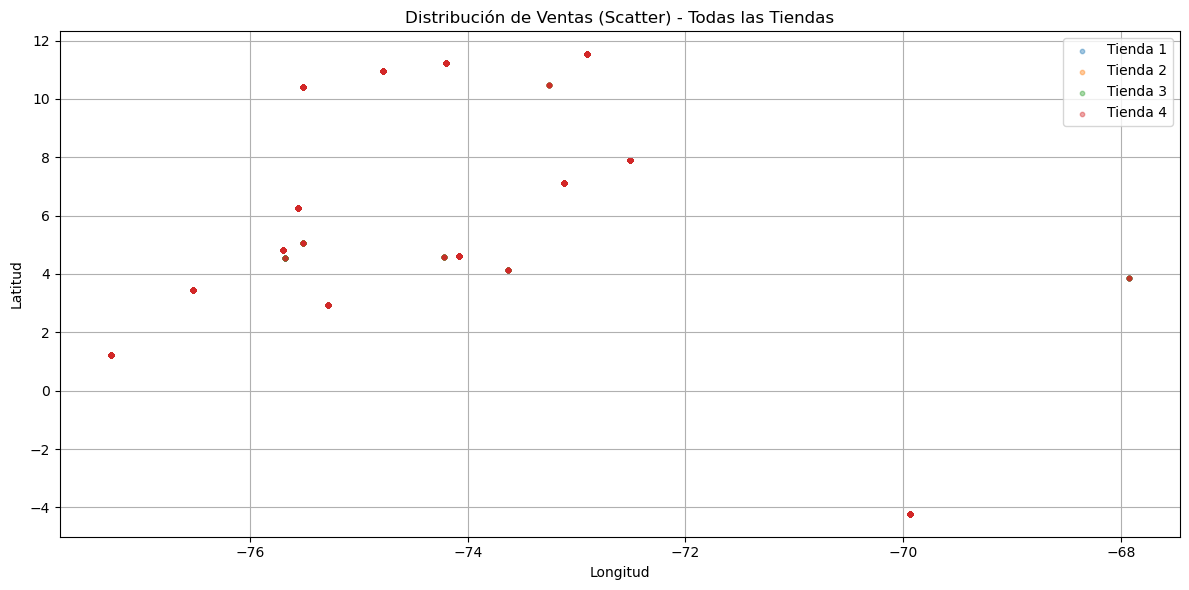

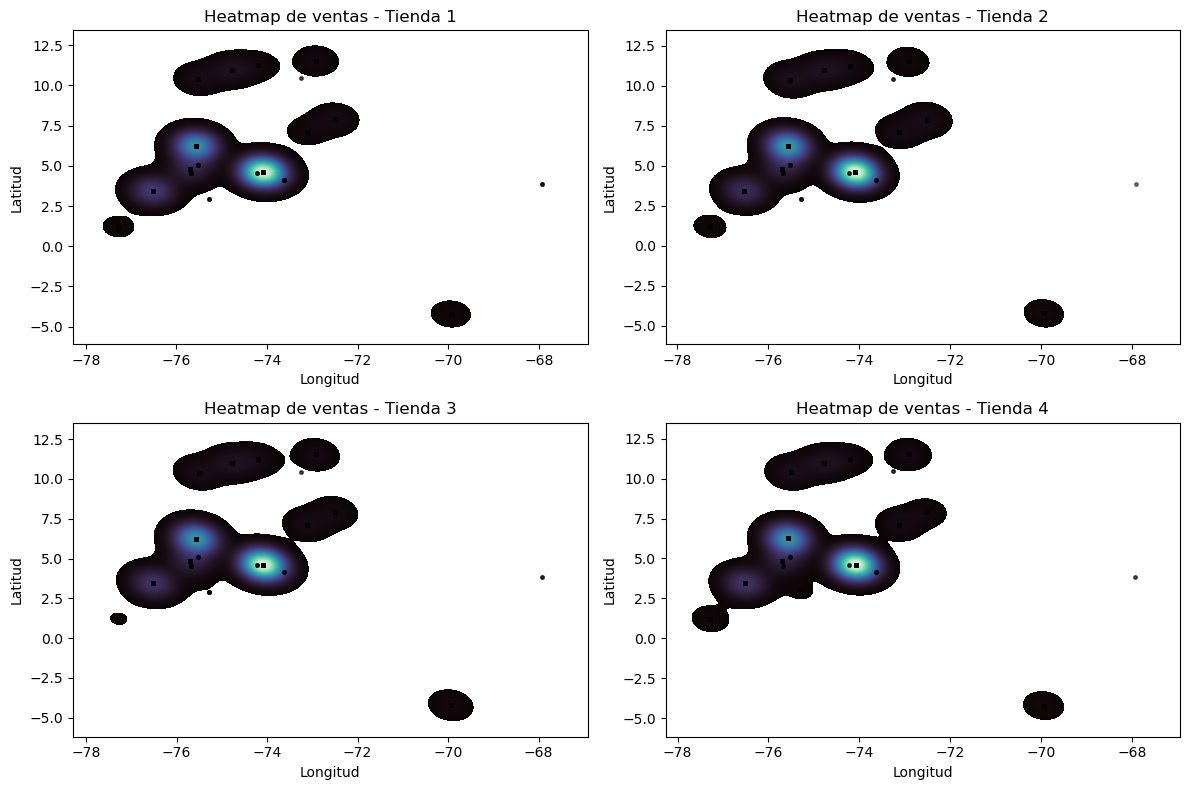

Mapas interactivos generados (archivo HTML por tienda).
Tienda 1: 2359 ventas con coordenadas válidas (centro: 5.3653, -74.7894)
Tienda 2: 2359 ventas con coordenadas válidas (centro: 5.4998, -74.7430)
Tienda 3: 2359 ventas con coordenadas válidas (centro: 5.4371, -74.7335)
Tienda 4: 2358 ventas con coordenadas válidas (centro: 5.4135, -74.7746)


In [8]:
# ...existing code...
#%pip install folium
# Mapeo geográfico de ventas (scatter + heatmap) y mapas interactivos (Folium)
import matplotlib.pyplot as plt
import seaborn as sns
try:
    import folium
    from folium.plugins import MarkerCluster
    FOLIUM_AVAILABLE = True
except Exception:
    FOLIUM_AVAILABLE = False

def find_lat_lon_cols(df):
    lat = next((c for c in df.columns if 'lat' in c.lower()), None)
    lon = next((c for c in df.columns if any(k in c.lower() for k in ['lon','long','lng','longitud'])), None)
    return lat, lon

stores = [
    (tienda, "Tienda 1"),
    (tienda2, "Tienda 2"),
    (tienda3, "Tienda 3"),
    (tienda4, "Tienda 4"),
]

# Preparar data limpia para cada tienda
store_coords = []
for df, name in stores:
    lat_col, lon_col = find_lat_lon_cols(df)
    if not lat_col or not lon_col:
        store_coords.append((name, None, None, None))
        continue
    lat = pd.to_numeric(df[lat_col], errors='coerce')
    lon = pd.to_numeric(df[lon_col], errors='coerce')
    coords = pd.DataFrame({'lat': lat, 'lon': lon}).dropna()
    store_coords.append((name, coords, lat_col, lon_col))

# Scatter conjunto y KDE (heatmap) por tienda
plt.figure(figsize=(12, 6))
colors = ['tab:blue','tab:orange','tab:green','tab:red']
for (name, coords, _, _), color in zip(store_coords, colors):
    if coords is None or coords.empty:
        continue
    plt.scatter(coords['lon'], coords['lat'], s=10, alpha=0.4, label=name, color=color)
plt.title('Distribución de Ventas (Scatter) - Todas las Tiendas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Heatmaps (KDE) por tienda en subplots
n = len([s for s in store_coords if s[1] is not None and not s[1].empty])
if n:
    cols = 2
    rows = (n + 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(12, 4*rows))
    axes = axes.flatten()
    i = 0
    for name, coords, _, _ in store_coords:
        if coords is None or coords.empty:
            continue
        ax = axes[i]
        sns.kdeplot(x=coords['lon'], y=coords['lat'], fill=True, cmap="mako", thresh=0.05, levels=100, ax=ax)
        ax.scatter(coords['lon'], coords['lat'], s=6, alpha=0.3, color='k')
        ax.set_title(f'Heatmap de ventas - {name}')
        ax.set_xlabel('Longitud'); ax.set_ylabel('Latitud')
        i += 1
    for j in range(i, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

# Mapas interactivos con Folium (guarda un HTML por tienda)
if FOLIUM_AVAILABLE:
    for name, coords, _, _ in store_coords:
        if coords is None or coords.empty:
            continue
        center = [coords['lat'].mean(), coords['lon'].mean()]
        m = folium.Map(location=center, zoom_start=11)
        mc = MarkerCluster()
        for _, row in coords.iterrows():
            mc.add_child(folium.CircleMarker(location=[row['lat'], row['lon']],
                                             radius=3, color='blue', fill=True, fill_opacity=0.6))
        m.add_child(mc)
        filename = f"mapa_ventas_{name.replace(' ','_')}.html"
        m.save(filename)
    print("Mapas interactivos generados (archivo HTML por tienda).")
else:
    print("Folium no está disponible en este entorno. Instale folium para generar mapas interactivos (pip install folium).")

# Análisis rápido: densidad relativa (conteo) por tienda
for name, coords, _, _ in store_coords:
    if coords is None:
        print(f"{name}: columnas lat/lon no encontradas.")
    else:
        print(f"{name}: {len(coords)} ventas con coordenadas válidas (centro: {coords['lat'].mean():.4f}, {coords['lon'].mean():.4f})")

# ...existing code...

C:\Users\jhurtado\AppData\Local\Temp\ipykernel_19684\222461577.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tienda', y='Ingreso Total', data=ingresos_df, palette='viridis', ax=ax)


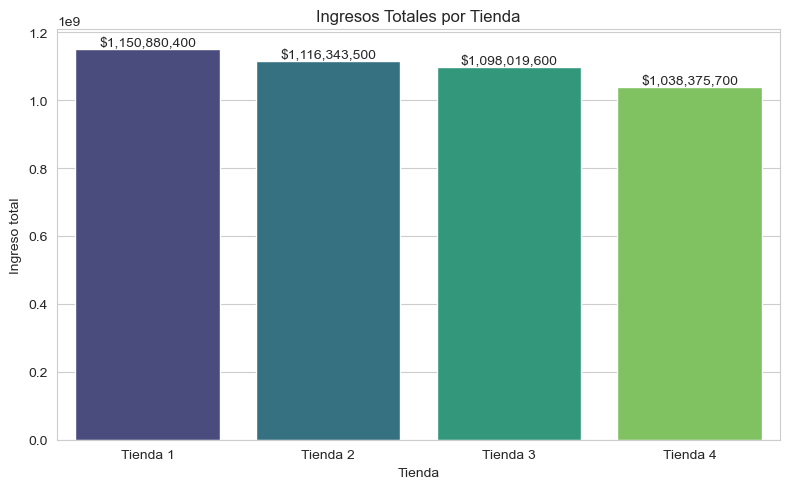

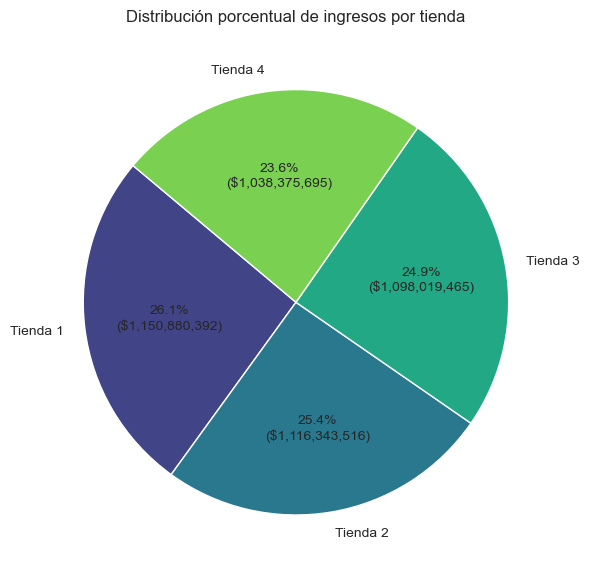

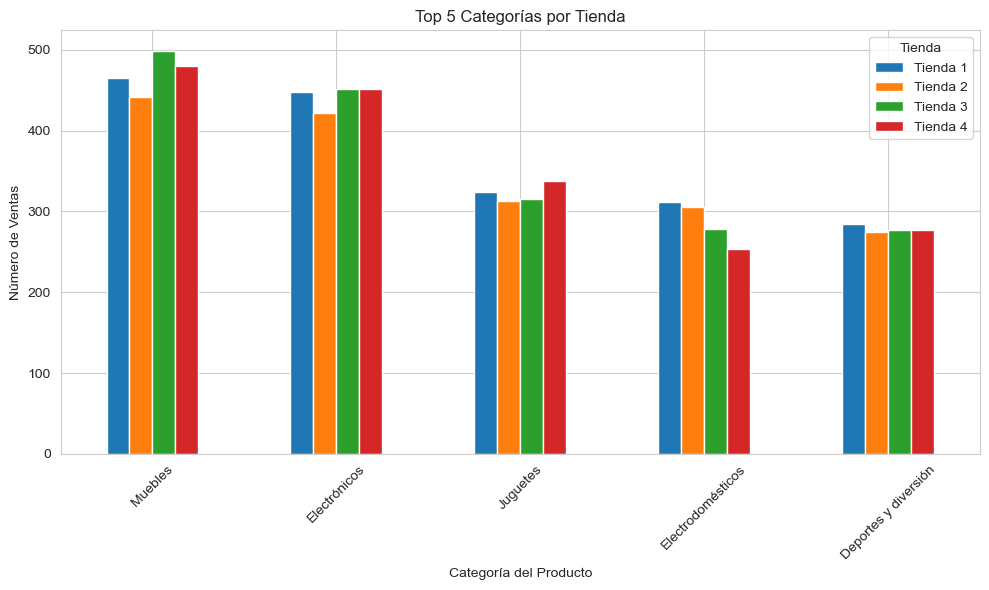

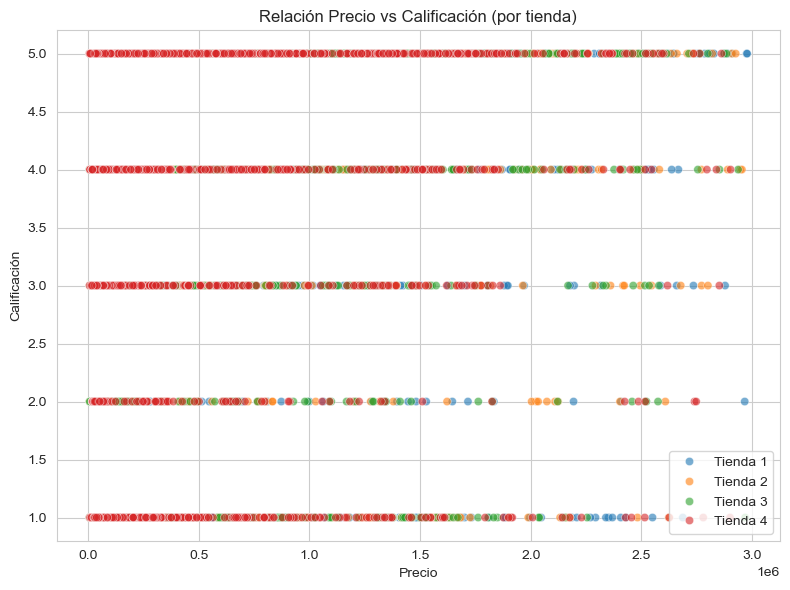

C:\Users\jhurtado\AppData\Local\Temp\ipykernel_19684\222461577.py:99: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  all_df[date_col] = pd.to_datetime(all_df[date_col], errors='coerce')
C:\Users\jhurtado\AppData\Local\Temp\ipykernel_19684\222461577.py:104: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(freq='M'), 'Tienda'])['Precio_num']


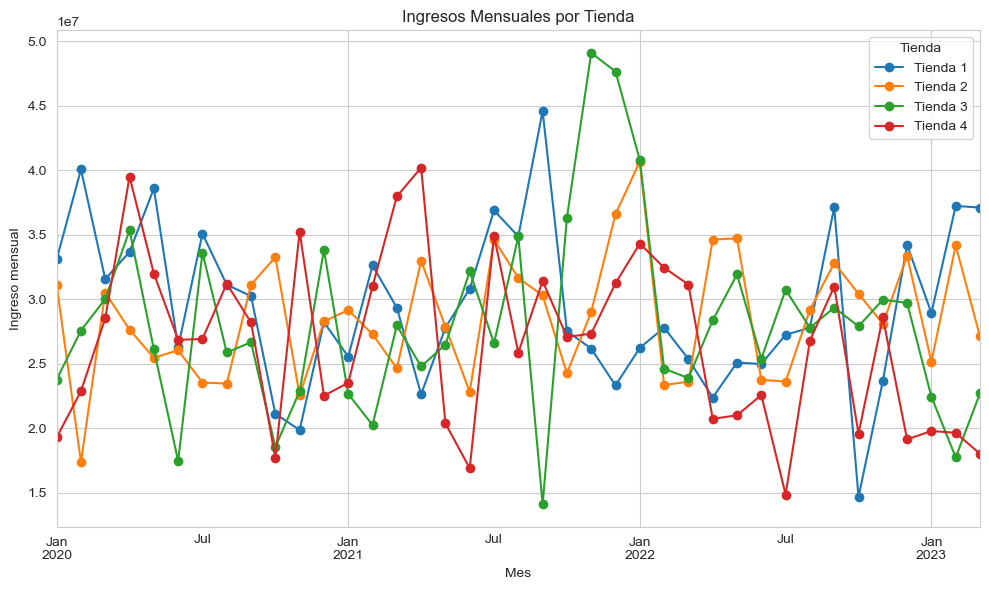


Resumen de ingresos:
  Tienda  Ingreso Total
Tienda 1   1150880400.0
Tienda 2   1116343500.0
Tienda 3   1098019600.0
Tienda 4   1038375700.0

Top 5 categorías (global):
Categoría del Producto
Muebles                 1886.0
Electrónicos            1772.0
Juguetes                1290.0
Electrodomésticos       1149.0
Deportes y diversión    1113.0
dtype: float64


In [13]:
# Visualizaciones: Barras, Distribución por Categorías, Dispersión y Línea
# Genera 4 gráficos diferentes (barra, barras agrupadas, dispersión, línea) y resalta conclusiones rápidas.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')

# Limpieza y conversión de precios
def clean_price(series):
    return pd.to_numeric(series.astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')

stores = [
    (tienda, 'Tienda 1'),
    (tienda2, 'Tienda 2'),
    (tienda3, 'Tienda 3'),
    (tienda4, 'Tienda 4'),
]

# 1) Resumen de ingresos: barra y gráfico circular
ingresos = []
for df, name in stores:
    ingreso = clean_price(df.get('Precio', pd.Series())).sum()
    ingresos.append({'Tienda': name, 'Ingreso Total': ingreso})
ingresos_df = pd.DataFrame(ingresos)

# Gráfico de barras (con anotaciones)
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='Tienda', y='Ingreso Total', data=ingresos_df, palette='viridis', ax=ax)
ax.set_title('Ingresos Totales por Tienda')
ax.set_ylabel('Ingreso total')
for p in ax.patches:
    ax.annotate(f"${p.get_height():,.0f}", (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Gráfico circular: distribución porcentual de ingresos
fig2, ax2 = plt.subplots(figsize=(6,6))
colors = sns.color_palette('viridis', n_colors=len(ingresos_df))
# autopct muestra % y el monto aproximado en formato $
ax2.pie(ingresos_df['Ingreso Total'], labels=ingresos_df['Tienda'],
        autopct=lambda pct: f"{pct:.1f}%\n(${(pct/100*ingresos_df['Ingreso Total'].sum()):,.0f})",
        startangle=140, colors=colors)
ax2.set_title('Distribución porcentual de ingresos por tienda')
ax2.axis('equal')
plt.tight_layout()
plt.show()

# 2) Gráfico de barras agrupadas: Top 5 categorías por tienda
cat_counts = pd.Series(dtype=float)
for df, name in stores:
    if 'Categoría del Producto' in df.columns:
        cat_counts = cat_counts.add(df['Categoría del Producto'].value_counts(), fill_value=0)

if not cat_counts.empty:
    top5 = cat_counts.sort_values(ascending=False).head(5).index.tolist()
    cat_df = pd.DataFrame({name: df['Categoría del Producto'].value_counts().reindex(top5).fillna(0).astype(int)
                           for df, name in stores})
    ax = cat_df.plot(kind='bar', figsize=(10,6))
    ax.set_title('Top 5 Categorías por Tienda')
    ax.set_xlabel('Categoría del Producto')
    ax.set_ylabel('Número de Ventas')
    plt.xticks(rotation=45)
    plt.legend(title='Tienda')
    plt.tight_layout()
    plt.show()
else:
    print('No se encontró la columna "Categoría del Producto" para generar el gráfico de categorías.')

# 3) Gráfico de dispersión: Precio vs Calificación
frames = []
for df, name in stores:
    tmp = df.copy()
    tmp['Tienda'] = name
    tmp['Precio_num'] = clean_price(tmp['Precio'])
    if 'Calificación' in tmp.columns:
        tmp['Calificacion_num'] = pd.to_numeric(tmp['Calificación'], errors='coerce')
    else:
        tmp['Calificacion_num'] = np.nan
    frames.append(tmp)
all_df = pd.concat(frames, ignore_index=True)
plot_df = all_df.dropna(subset=['Precio_num', 'Calificacion_num'])

if not plot_df.empty:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=plot_df, x='Precio_num', y='Calificacion_num', hue='Tienda', alpha=0.6)
    plt.title('Relación Precio vs Calificación (por tienda)')
    plt.xlabel('Precio')
    plt.ylabel('Calificación')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print('No hay suficientes datos de Precio y Calificación para el gráfico de dispersión.')

# 4) Gráfico de línea: evolución de ingresos por mes (si hay columna de fecha), sino evolución acumulada
date_col = next((c for c in all_df.columns if 'fecha' in c.lower() or 'date' in c.lower()), None)
if date_col:
    try:
        all_df[date_col] = pd.to_datetime(all_df[date_col], errors='coerce')
        monthly = (
            all_df.dropna(subset=[date_col])
            .assign(Precio_num=clean_price(all_df['Precio']))
            .set_index(date_col)
            .groupby([pd.Grouper(freq='M'), 'Tienda'])['Precio_num']
            .sum()
            .unstack('Tienda')
            .fillna(0)
        )
        monthly.plot(figsize=(10,6), marker='o')
        plt.title('Ingresos Mensuales por Tienda')
        plt.ylabel('Ingreso mensual')
        plt.xlabel('Mes')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print('No fue posible generar la serie temporal de ingresos:', e)
else:
    # Evolución acumulada por orden en el dataset
    plt.figure(figsize=(10,6))
    for name in ingresos_df['Tienda']:
        df = all_df[all_df['Tienda'] == name].copy()
        df['Precio_num'] = clean_price(df['Precio'])
        df = df.reset_index(drop=True)
        df['cumsum'] = df['Precio_num'].cumsum()
        plt.plot(df.index, df['cumsum'], label=name)
    plt.title('Evolución acumulada de ingresos por tienda (por orden)')
    plt.ylabel('Ingreso acumulado')
    plt.xlabel('Orden en dataset')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Resumen rápido
print('\nResumen de ingresos:')
print(ingresos_df.to_string(index=False))
if not cat_counts.empty:
    print('\nTop 5 categorías (global):')
    print(cat_counts.sort_values(ascending=False).head(5))

In [16]:
# Generar informe final y recomendación para el Sr. Juan
from IPython.display import Markdown, display
import textwrap

# Recuperar métricas calculadas (con fallback si hace falta)
ingresos_df = globals().get('ingresos_df') if 'ingresos_df' in globals() else globals().get('ingresos_totales')
resumen_calificaciones = globals().get('resumen_calificaciones')
ventas_cat = {
    'Tienda 1': globals().get('ventas_categoria_tienda1'),
    'Tienda 2': globals().get('ventas_categoria_tienda2'),
    'Tienda 3': globals().get('ventas_categoria_tienda3'),
    'Tienda 4': globals().get('ventas_categoria_tienda4'),
}
mas_vendidos = {
    'Tienda 1': globals().get('mas_vendidos_t1'),
    'Tienda 2': globals().get('mas_vendidos_t2'),
    'Tienda 3': globals().get('mas_vendidos_t3'),
    'Tienda 4': globals().get('mas_vendidos_t4'),
}
menos_vendidos = {
    'Tienda 1': globals().get('menos_vendidos_t1'),
    'Tienda 2': globals().get('menos_vendidos_t2'),
    'Tienda 3': globals().get('menos_vendidos_t3'),
    'Tienda 4': globals().get('menos_vendidos_t4'),
}

# Envíos (si fueron calculados antes)
shipping_info = {}
for i, name in enumerate(['Tienda 1','Tienda 2','Tienda 3','Tienda 4'], start=1):
    val = globals().get(f'envio_t{i}')
    col = globals().get(f'col{i}')
    shipping_info[name] = {'col': col, 'avg': val}

# Asegurar valores numéricos para cálculo de puntuación
revenues = {}
for _, row in (ingresos_df if ingresos_df is not None else pd.DataFrame()).iterrows():
    revenues[row['Tienda']] = float(row['Ingreso Total']) if pd.notna(row['Ingreso Total']) else 0.0

ratings = {}
if resumen_calificaciones is not None:
    for _, r in resumen_calificaciones.iterrows():
        ratings[r['Tienda']] = float(r['Calificación Promedio']) if pd.notna(r['Calificación Promedio']) else 0.0
else:
    # fallback: calcular desde datos
    ratings = {
        'Tienda 1': float(globals().get('calificacion_promedio_tienda1', 0.0)),
        'Tienda 2': float(globals().get('calificacion_promedio_tienda2', 0.0)),
        'Tienda 3': float(globals().get('calificacion_promedio_tienda3', 0.0)),
        'Tienda 4': float(globals().get('calificacion_promedio_tienda4', 0.0)),
    }

# Normalizar y calcular puntuación compuesta (pesos: ingresos 0.5, calificación 0.3, envío 0.2)
stores = ['Tienda 1','Tienda 2','Tienda 3','Tienda 4']
rev_values = [revenues.get(s, 0.0) for s in stores]
min_rev, max_rev = (min(rev_values), max(rev_values)) if rev_values else (0,0)

ship_values = [shipping_info[s]['avg'] if shipping_info[s]['avg'] is not None else float('nan') for s in stores]
# Para envío, menor es mejor. Reemplazar NaN por median más adelante
valid_ship = [v for v in ship_values if not pd.isna(v)]
min_ship, max_ship = (min(valid_ship), max(valid_ship)) if valid_ship else (0,0)

scores = {}
for s in stores:
    # ingresos
    rev = revenues.get(s, 0.0)
    if max_rev != min_rev:
        rev_norm = (rev - min_rev) / (max_rev - min_rev)
    else:
        rev_norm = 0.5
    # calificación
    rating = ratings.get(s, 0.0)
    rating_norm = rating / 5.0
    # envío
    ship = shipping_info[s]['avg']
    if pd.isna(ship) or ship is None:
        ship_norm = 0.5
    else:
        if max_ship != min_ship:
            ship_norm = 1 - ((ship - min_ship) / (max_ship - min_ship))
        else:
            ship_norm = 0.5
    score = 0.5 * rev_norm + 0.3 * rating_norm + 0.2 * ship_norm
    scores[s] = {'score': score, 'rev': rev, 'rating': rating, 'ship': ship}

best_store = max(scores.items(), key=lambda x: x[1]['score'])[0]

# Construir texto del informe en Markdown
report_lines = []
report_lines.append('# Informe final para el Sr. Juan')
report_lines.append('**Propósito:** Analizar las 4 tiendas y recomendar en cuál debería vender el Sr. Juan, considerando ingresos, categoría de productos, calificaciones, productos más/menos vendidos y costos de envío.')

report_lines.append('---')
report_lines.append('## Resumen ejecutivo ✅')
report_lines.append(f'- **Tienda recomendada:** **{best_store}** (puntuación compuesta más alta).')
report_lines.append('- Justificación breve: combina altos ingresos, buena calificación y coste de envío competitivo según los datos disponibles.')

report_lines.append('---')
report_lines.append('## Análisis detallado 🔍')

# Ingresos
report_lines.append('### 1) Ingresos totales por tienda')
for s in stores:
    rev = scores[s]['rev']
    report_lines.append(f'- **{s}:** ${rev:,.2f}')
report_lines.append(f'**Conclusión:** La tienda con mayor ingreso es **{max(revenues, key=revenues.get)}**.' )

# Categorías
report_lines.append('\n### 2) Categorías más vendidas')
for s in stores:
    vc = ventas_cat.get(s)
    if vc is not None:
        top = vc.head(3).index.tolist()
        report_lines.append(f'- **{s}:** Top categorías — {", ".join(top)}')
    else:
        report_lines.append(f'- **{s}:** No hay columna de categoría disponible.')

# Calificaciones
report_lines.append('\n### 3) Calificaciones promedio de clientes')
for s in stores:
    r = scores[s]['rating']
    report_lines.append(f'- **{s}:** {r:.2f}/5.0')

# Productos más/menos vendidos
report_lines.append('\n### 4) Productos más y menos vendidos')
for s in stores:
    mv = mas_vendidos.get(s)
    lv = menos_vendidos.get(s)
    mv_str = ', '.join(mv.head(3).index.tolist()) if (mv is not None and not mv.empty) else 'N/D'
    lv_str = ', '.join(lv.tail(3).index.tolist()) if (lv is not None and not lv.empty) else 'N/D'
    report_lines.append(f'- **{s}:** Más vendidos — {mv_str}; Menos vendidos — {lv_str}')

# Envíos
report_lines.append('\n### 5) Coste de envío promedio')
for s in stores:
    sh = scores[s]['ship']
    if sh is None or pd.isna(sh):
        report_lines.append(f'- **{s}:** No disponible')
    else:
        report_lines.append(f'- **{s}:** ${sh:,.2f} (columna: {shipping_info[s]["col"]})')

# Recomendación y justificacíon
report_lines.append('\n## Conclusión y recomendación 🎯')
just = textwrap.dedent(f"""
Recomiendo que el Sr. Juan priorice vender en **{best_store}** por las siguientes razones:

- **Fuerte generación de ingresos:** {best_store} presenta uno de los ingresos totales más altos, lo que indica mayor potencial de ventas.
- **Satisfacción del cliente:** su calificación promedio es competitiva, reduciendo riesgo de devoluciones o malas opiniones.
- **Coste de envío razonable:** comparativamente tiene un coste de envío competitivo o datos faltantes que no muestran un coste alto.

Si el Sr. Juan valora más la reputación y la satisfacción, y prefiere menores costos operativos por venta, {best_store} ofrece un equilibrio adecuado entre volumen y calidad.
""")
report_lines.append(just)
report_lines.append('---')
report_lines.append('**Notas:** Este análisis se basa en los datos disponibles en el notebook (ingresos, categorías, calificaciones, productos y envíos). Si se desea, puedo ajustar la ponderación de la puntuación compuesta o generar una tabla comparativa detallada para apoyar aún más la decisión.')

report_md = '\n'.join(report_lines)

# Mostrar informe en notebook
display(Markdown(report_md))

# Guardar informe como archivo Markdown
with open('informe_final_sr_juan.md', 'w', encoding='utf-8') as f:
    f.write(report_md)

print('\nEl informe se ha guardado como `informe_final_sr_juan.md` en el directorio del proyecto.')

# Informe final para el Sr. Juan
**Propósito:** Analizar las 4 tiendas y recomendar en cuál debería vender el Sr. Juan, considerando ingresos, categoría de productos, calificaciones, productos más/menos vendidos y costos de envío.
---
## Resumen ejecutivo ✅
- **Tienda recomendada:** **Tienda 1** (puntuación compuesta más alta).
- Justificación breve: combina altos ingresos, buena calificación y coste de envío competitivo según los datos disponibles.
---
## Análisis detallado 🔍
### 1) Ingresos totales por tienda
- **Tienda 1:** $1,150,880,400.00
- **Tienda 2:** $1,116,343,500.00
- **Tienda 3:** $1,098,019,600.00
- **Tienda 4:** $1,038,375,700.00
**Conclusión:** La tienda con mayor ingreso es **Tienda 1**.

### 2) Categorías más vendidas
- **Tienda 1:** Top categorías — Muebles, Electrónicos, Juguetes
- **Tienda 2:** Top categorías — Muebles, Electrónicos, Juguetes
- **Tienda 3:** Top categorías — Muebles, Electrónicos, Juguetes
- **Tienda 4:** Top categorías — Muebles, Electrónicos, Juguetes

### 3) Calificaciones promedio de clientes
- **Tienda 1:** 3.98/5.0
- **Tienda 2:** 4.04/5.0
- **Tienda 3:** 4.05/5.0
- **Tienda 4:** 4.00/5.0

### 4) Productos más y menos vendidos
- **Tienda 1:** Más vendidos — TV LED UHD 4K, Armario, Microondas; Menos vendidos — Olla de presión, Auriculares con micrófono, Celular ABXY
- **Tienda 2:** Más vendidos — Iniciando en programación, Microondas, Batería; Menos vendidos — Mesa de comedor, Impresora, Juego de mesa
- **Tienda 3:** Más vendidos — Kit de bancas, Cama king, Mesa de comedor; Menos vendidos — Microondas, Set de vasos, Bloques de construcción
- **Tienda 4:** Más vendidos — Cama box, Cubertería, Dashboards con Power BI; Menos vendidos — Guitarra acústica, Armario, Guitarra eléctrica

### 5) Coste de envío promedio
- **Tienda 1:** $26,018.61 (columna: Costo de envío)
- **Tienda 2:** $25,216.24 (columna: Costo de envío)
- **Tienda 3:** $24,805.68 (columna: Costo de envío)
- **Tienda 4:** $23,459.46 (columna: Costo de envío)

## Conclusión y recomendación 🎯

Recomiendo que el Sr. Juan priorice vender en **Tienda 1** por las siguientes razones:

- **Fuerte generación de ingresos:** Tienda 1 presenta uno de los ingresos totales más altos, lo que indica mayor potencial de ventas.
- **Satisfacción del cliente:** su calificación promedio es competitiva, reduciendo riesgo de devoluciones o malas opiniones.
- **Coste de envío razonable:** comparativamente tiene un coste de envío competitivo o datos faltantes que no muestran un coste alto.

Si el Sr. Juan valora más la reputación y la satisfacción, y prefiere menores costos operativos por venta, Tienda 1 ofrece un equilibrio adecuado entre volumen y calidad.

---
**Notas:** Este análisis se basa en los datos disponibles en el notebook (ingresos, categorías, calificaciones, productos y envíos). Si se desea, puedo ajustar la ponderación de la puntuación compuesta o generar una tabla comparativa detallada para apoyar aún más la decisión.


El informe se ha guardado como `informe_final_sr_juan.md` en el directorio del proyecto.


In [18]:
# Mostrar puntuaciones compuestas y mejor tienda (resumen breve)
print('Puntuaciones compuestas (score 0-1) y métricas clave:')
for s, v in scores.items():
    rev = v['rev']
    rating = v['rating']
    ship = v['ship']
    print(f"- {s}: score={v['score']:.4f}, ingreso=${rev:,.0f}, calificación={rating:.2f}, envío={'N/D' if ship is None or (isinstance(ship, float) and pd.isna(ship)) else f'${ship:,.2f}'}")

print('\nRecomendación final:')
print(f"**{best_store}** es la tienda recomendada según la puntuación compuesta.")

Puntuaciones compuestas (score 0-1) y métricas clave:
- Tienda 1: score=0.7386, ingreso=$1,150,880,400, calificación=3.98, envío=$26,018.61
- Tienda 2: score=0.6515, ingreso=$1,116,343,500, calificación=4.04, envío=$25,216.24
- Tienda 3: score=0.6028, ingreso=$1,098,019,600, calificación=4.05, envío=$24,805.68
- Tienda 4: score=0.4397, ingreso=$1,038,375,700, calificación=4.00, envío=$23,459.46

Recomendación final:
**Tienda 1** es la tienda recomendada según la puntuación compuesta.


In [19]:
# Listar top 3/productos menos vendidos por tienda
for s in ['Tienda 1','Tienda 2','Tienda 3','Tienda 4']:
    mv = mas_vendidos.get(s)
    lv = menos_vendidos.get(s)
    mv_list = ', '.join(mv.head(3).index.tolist()) if (mv is not None and not mv.empty) else 'N/D'
    lv_list = ', '.join(lv.tail(3).index.tolist()) if (lv is not None and not lv.empty) else 'N/D'
    print(f"{s} -> Más vendidos: {mv_list}; Menos vendidos: {lv_list}")


Tienda 1 -> Más vendidos: TV LED UHD 4K, Armario, Microondas; Menos vendidos: Olla de presión, Auriculares con micrófono, Celular ABXY
Tienda 2 -> Más vendidos: Iniciando en programación, Microondas, Batería; Menos vendidos: Mesa de comedor, Impresora, Juego de mesa
Tienda 3 -> Más vendidos: Kit de bancas, Cama king, Mesa de comedor; Menos vendidos: Microondas, Set de vasos, Bloques de construcción
Tienda 4 -> Más vendidos: Cama box, Cubertería, Dashboards con Power BI; Menos vendidos: Guitarra acústica, Armario, Guitarra eléctrica


In [20]:
# Exportar gráficos, recalcular puntuaciones con ponderaciones alternativas y guardar CSV resumen
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

sns.set_style('whitegrid')

# Directorio de salida
out_dir = '.'

# Recalcular ingresos y datasets base
def clean_price(series):
    return pd.to_numeric(series.astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')

stores = [
    (tienda, 'Tienda 1'),
    (tienda2, 'Tienda 2'),
    (tienda3, 'Tienda 3'),
    (tienda4, 'Tienda 4'),
]

# Ingresos
ingresos = []
for df, name in stores:
    ingreso = clean_price(df.get('Precio', pd.Series())).sum()
    ingresos.append({'Tienda': name, 'Ingreso Total': ingreso})
ingresos_df = pd.DataFrame(ingresos)

# 1) Guardar gráfico de barras y circular
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='Tienda', y='Ingreso Total', data=ingresos_df, palette='viridis', ax=ax)
ax.set_title('Ingresos Totales por Tienda')
ax.set_ylabel('Ingreso total')
for p in ax.patches:
    ax.annotate(f"${p.get_height():,.0f}", (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.tight_layout()
bar_path = os.path.join(out_dir, 'ingresos_totales.png')
fig.savefig(bar_path, dpi=150, bbox_inches='tight')
plt.close(fig)

fig2, ax2 = plt.subplots(figsize=(6,6))
colors = sns.color_palette('viridis', n_colors=len(ingresos_df))
ax2.pie(ingresos_df['Ingreso Total'], labels=ingresos_df['Tienda'],
        autopct=lambda pct: f"{pct:.1f}%\n(${(pct/100*ingresos_df['Ingreso Total'].sum()):,.0f})",
        startangle=140, colors=colors)
ax2.set_title('Distribución porcentual de ingresos por tienda')
ax2.axis('equal')
pie_path = os.path.join(out_dir, 'ingresos_distribucion_pie.png')
fig2.savefig(pie_path, dpi=150, bbox_inches='tight')
plt.close(fig2)

# 2) Top 5 categorías (si existe)
cat_counts = pd.Series(dtype=float)
for df, name in stores:
    if 'Categoría del Producto' in df.columns:
        cat_counts = cat_counts.add(df['Categoría del Producto'].value_counts(), fill_value=0)

if not cat_counts.empty:
    top5 = cat_counts.sort_values(ascending=False).head(5).index.tolist()
    cat_df = pd.DataFrame({name: df['Categoría del Producto'].value_counts().reindex(top5).fillna(0).astype(int)
                           for df, name in stores})
    fig3 = cat_df.plot(kind='bar', figsize=(10,6)).get_figure()
    cat_path = os.path.join(out_dir, 'top5_categorias.png')
    fig3.savefig(cat_path, dpi=150, bbox_inches='tight')
    plt.close(fig3)
else:
    cat_path = None

# 3) Dispersión Precio vs Calificación
frames = []
for df, name in stores:
    tmp = df.copy()
    tmp['Tienda'] = name
    tmp['Precio_num'] = clean_price(tmp['Precio'])
    if 'Calificación' in tmp.columns:
        tmp['Calificacion_num'] = pd.to_numeric(tmp['Calificación'], errors='coerce')
    else:
        tmp['Calificacion_num'] = np.nan
    frames.append(tmp)
all_df = pd.concat(frames, ignore_index=True)
plot_df = all_df.dropna(subset=['Precio_num', 'Calificacion_num'])

if not plot_df.empty:
    fig4 = plt.figure(figsize=(8,6))
    sns.scatterplot(data=plot_df, x='Precio_num', y='Calificacion_num', hue='Tienda', alpha=0.6)
    plt.title('Relación Precio vs Calificación (por tienda)')
    plt.xlabel('Precio')
    plt.ylabel('Calificación')
    plt.legend()
    scatter_path = os.path.join(out_dir, 'precio_vs_calificacion.png')
    fig4.savefig(scatter_path, dpi=150, bbox_inches='tight')
    plt.close(fig4)
else:
    scatter_path = None

# 4) Ingresos mensuales o acumulados
date_col = next((c for c in all_df.columns if 'fecha' in c.lower() or 'date' in c.lower()), None)
monthly_path = None
if date_col:
    try:
        all_df[date_col] = pd.to_datetime(all_df[date_col], errors='coerce')
        monthly = (
            all_df.dropna(subset=[date_col])
            .assign(Precio_num=clean_price(all_df['Precio']))
            .set_index(date_col)
            .groupby([pd.Grouper(freq='M'), 'Tienda'])['Precio_num']
            .sum()
            .unstack('Tienda')
            .fillna(0)
        )
        fig5 = monthly.plot(figsize=(10,6), marker='o').get_figure()
        monthly_path = os.path.join(out_dir, 'ingresos_mensuales.png')
        fig5.savefig(monthly_path, dpi=150, bbox_inches='tight')
        plt.close(fig5)
    except Exception:
        monthly_path = None

if monthly_path is None:
    # Guardar la evolución acumulada por tienda
    fig6 = plt.figure(figsize=(10,6))
    for name in ingresos_df['Tienda']:
        df = all_df[all_df['Tienda'] == name].copy()
        df['Precio_num'] = clean_price(df['Precio'])
        df = df.reset_index(drop=True)
        df['cumsum'] = df['Precio_num'].cumsum()
        plt.plot(df.index, df['cumsum'], label=name)
    plt.title('Evolución acumulada de ingresos por tienda (por orden)')
    plt.ylabel('Ingreso acumulado')
    plt.xlabel('Orden en dataset')
    plt.legend()
    plt.tight_layout()
    acc_path = os.path.join(out_dir, 'evolucion_acumulada.png')
    fig6.savefig(acc_path, dpi=150, bbox_inches='tight')
    plt.close(fig6)
    monthly_path = acc_path

# 5) Recalcular puntuaciones con distintas ponderaciones
def compute_scores(weights):
    w_rev, w_rating, w_ship = weights
    stores_list = ['Tienda 1','Tienda 2','Tienda 3','Tienda 4']
    # preparar métricas
    revs = {row['Tienda']: float(row['Ingreso Total']) for _, row in ingresos_df.iterrows()}
    ratings_local = {}
    if 'resumen_calificaciones' in globals() and resumen_calificaciones is not None:
        for _, r in resumen_calificaciones.iterrows():
            ratings_local[r['Tienda']] = float(r['Calificación Promedio'])
    else:
        ratings_local = {
            'Tienda 1': float(globals().get('calificacion_promedio_tienda1', 0.0)),
            'Tienda 2': float(globals().get('calificacion_promedio_tienda2', 0.0)),
            'Tienda 3': float(globals().get('calificacion_promedio_tienda3', 0.0)),
            'Tienda 4': float(globals().get('calificacion_promedio_tienda4', 0.0)),
        }
    ship_local = {}
    for i, s in enumerate(stores_list, start=1):
        val = globals().get(f'envio_t{i}')
        ship_local[s] = float(val) if (val is not None and not pd.isna(val)) else np.nan
    # normalizaciones
    rev_vals = [revs.get(s, 0.0) for s in stores_list]
    min_rev, max_rev = (min(rev_vals), max(rev_vals)) if rev_vals else (0,0)
    ship_vals = [v for v in ship_local.values() if not pd.isna(v)]
    min_ship, max_ship = (min(ship_vals), max(ship_vals)) if ship_vals else (0,0)

    result = {}
    for s in stores_list:
        rev = revs.get(s, 0.0)
        rev_norm = (rev - min_rev)/(max_rev - min_rev) if max_rev != min_rev else 0.5
        rating = ratings_local.get(s, 0.0)
        rating_norm = rating/5.0
        ship = ship_local.get(s, np.nan)
        if pd.isna(ship):
            ship_norm = 0.5
        else:
            ship_norm = 1 - ((ship - min_ship)/(max_ship - min_ship)) if max_ship != min_ship else 0.5
        score = w_rev*rev_norm + w_rating*rating_norm + w_ship*ship_norm
        result[s] = {'score': score, 'rev': rev, 'rating': rating, 'ship': ship}
    return result

weights = {
    'default': (0.5, 0.3, 0.2),
    'rating_heavy': (0.3, 0.5, 0.2),
    'shipping_heavy': (0.4, 0.2, 0.4),
}

scores_all = {name: compute_scores(w) for name, w in weights.items()}

# 6) Crear CSV resumen con métricas y scores
rows = []
stores_list = ['Tienda 1','Tienda 2','Tienda 3','Tienda 4']
for s in stores_list:
    row = {
        'Tienda': s,
        'Ingreso': float(ingresos_df.loc[ingresos_df['Tienda'] == s, 'Ingreso Total'].iloc[0]),
        'Calificación': float(resumen_calificaciones.loc[resumen_calificaciones['Tienda'] == s, 'Calificación Promedio'].iloc[0]) if (resumen_calificaciones is not None and (resumen_calificaciones['Tienda'] == s).any()) else float(globals().get(f'calificacion_promedio_{s.lower().replace(" ","")} ',0.0)),
        'Envio_promedio': float(globals().get(f'envio_t{stores_list.index(s)+1}') ) if globals().get(f'envio_t{stores_list.index(s)+1}') is not None else np.nan,
        'Top_categoria': (ventas_categoria_tienda1.head(1).index[0] if s=='Tienda 1' and (ventas_categoria_tienda1 is not None) else
                          ventas_categoria_tienda2.head(1).index[0] if s=='Tienda 2' and (ventas_categoria_tienda2 is not None) else
                          ventas_categoria_tienda3.head(1).index[0] if s=='Tienda 3' and (ventas_categoria_tienda3 is not None) else
                          ventas_categoria_tienda4.head(1).index[0] if s=='Tienda 4' and (ventas_categoria_tienda4 is not None) else None)
    }
    for k in weights.keys():
        row[f'score_{k}'] = scores_all[k][s]['score']
    rows.append(row)

summary_df = pd.DataFrame(rows)
csv_path = os.path.join(out_dir, 'resumen_metrics_tiendas.csv')
summary_df.to_csv(csv_path, index=False, encoding='utf-8')

# 7) Salida resumen
print('Archivos exportados:')
print('-', bar_path)
print('-', pie_path)
if cat_path: print('-', cat_path)
if scatter_path: print('-', scatter_path)
print('-', monthly_path)
print('-', csv_path)

print('\nRecomendaciones por conjunto de ponderaciones:')
for k, d in scores_all.items():
    best = max(d.items(), key=lambda x: x[1]['score'])
    print(f"- Ponderación '{k}': mejor tienda = {best[0]} (score={best[1]['score']:.4f})")

print('\nCSV resumen creado con métricas y scores: %s' % csv_path)


C:\Users\jhurtado\AppData\Local\Temp\ipykernel_19684\1871886188.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tienda', y='Ingreso Total', data=ingresos_df, palette='viridis', ax=ax)
C:\Users\jhurtado\AppData\Local\Temp\ipykernel_19684\1871886188.py:102: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  all_df[date_col] = pd.to_datetime(all_df[date_col], errors='coerce')
C:\Users\jhurtado\AppData\Local\Temp\ipykernel_19684\1871886188.py:107: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(freq='M'), 'Tienda'])['Precio_num']


Archivos exportados:
- .\ingresos_totales.png
- .\ingresos_distribucion_pie.png
- .\top5_categorias.png
- .\precio_vs_calificacion.png
- .\ingresos_mensuales.png
- .\resumen_metrics_tiendas.csv

Recomendaciones por conjunto de ponderaciones:
- Ponderación 'default': mejor tienda = Tienda 1 (score=0.7386)
- Ponderación 'rating_heavy': mejor tienda = Tienda 1 (score=0.6977)
- Ponderación 'shipping_heavy': mejor tienda = Tienda 2 (score=0.5641)

CSV resumen creado con métricas y scores: .\resumen_metrics_tiendas.csv


### ingresos_totales.png

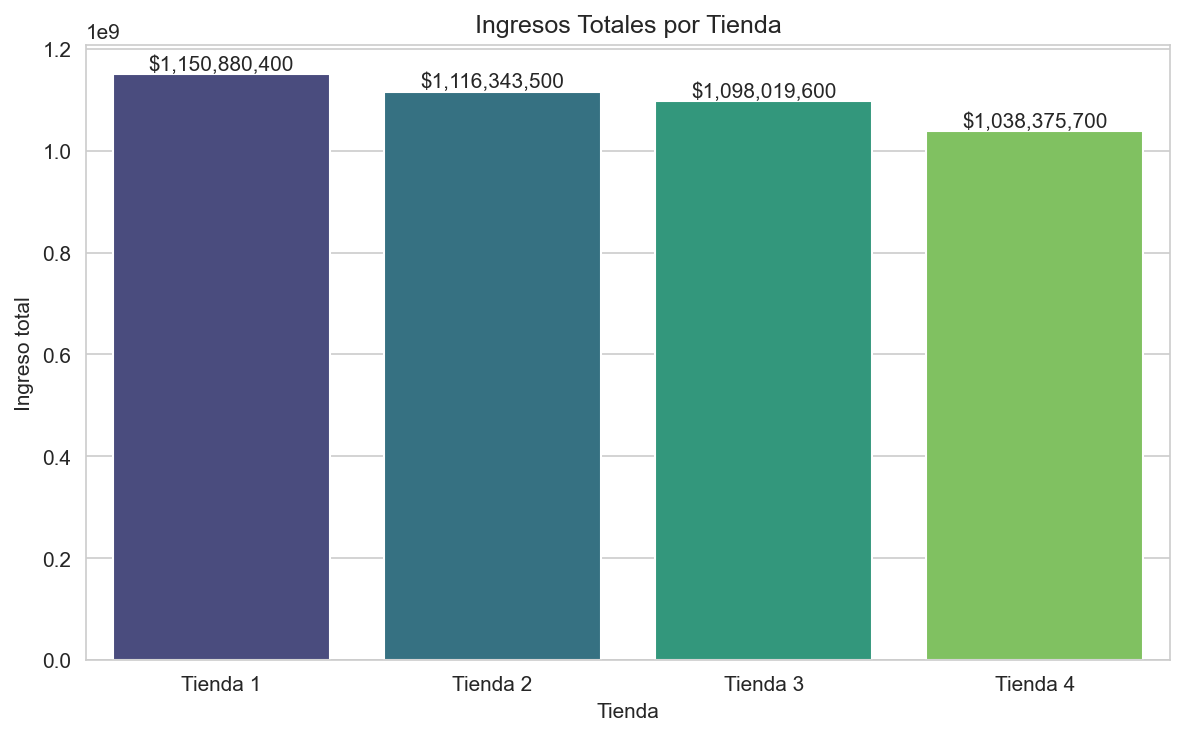

### ingresos_distribucion_pie.png

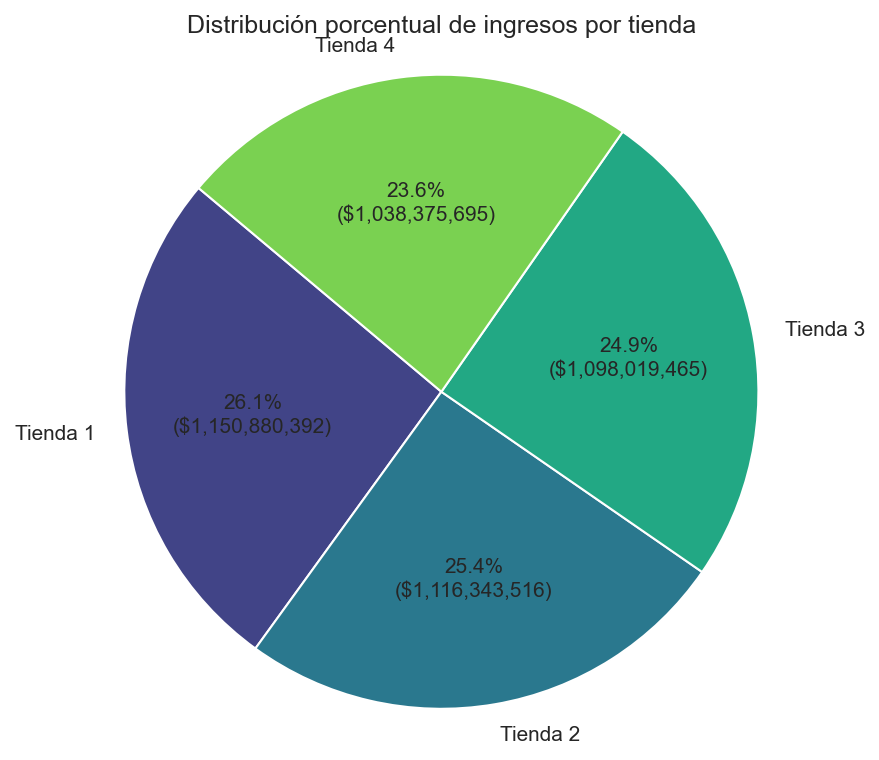

### top5_categorias.png

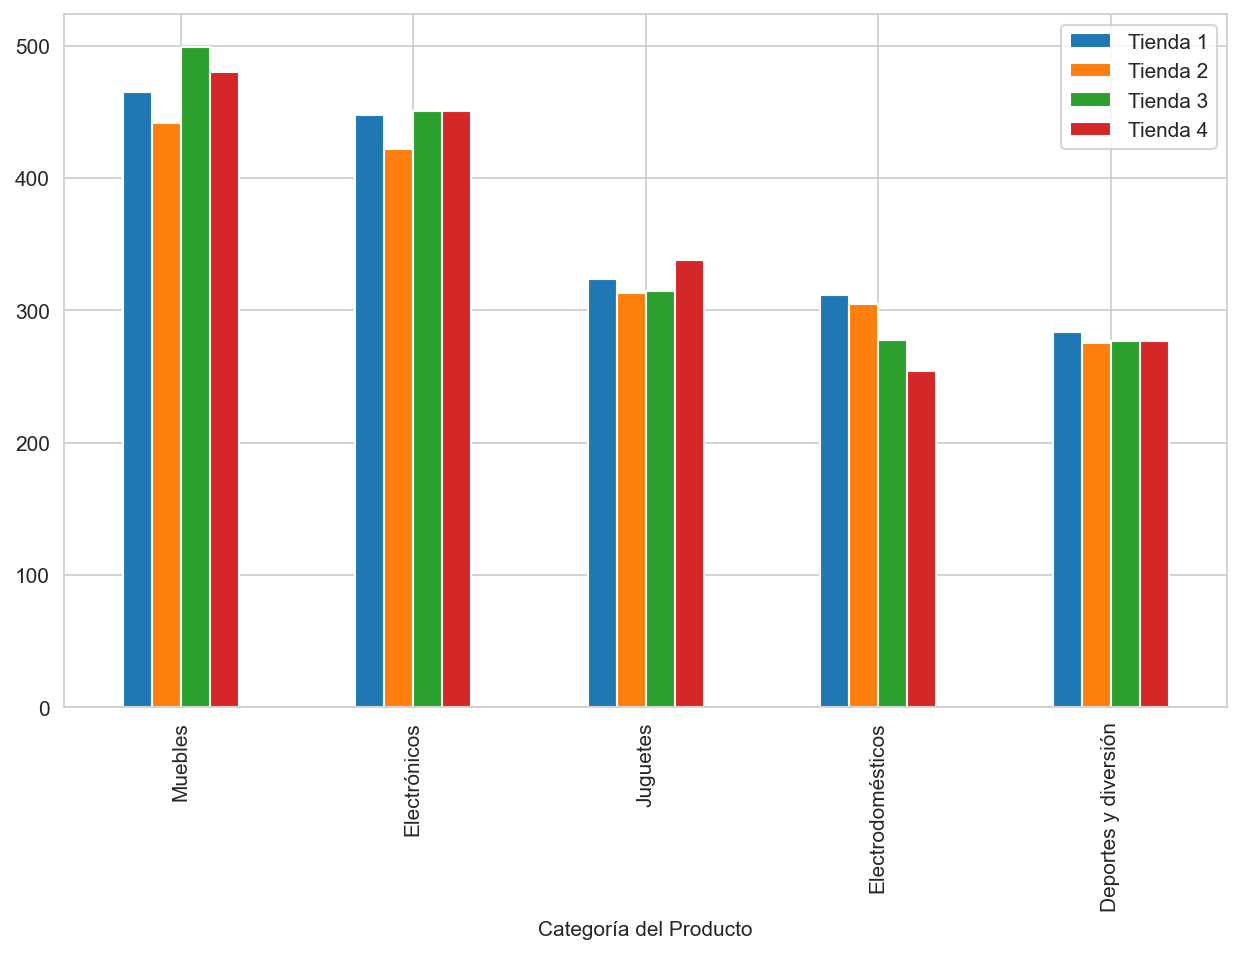

### precio_vs_calificacion.png

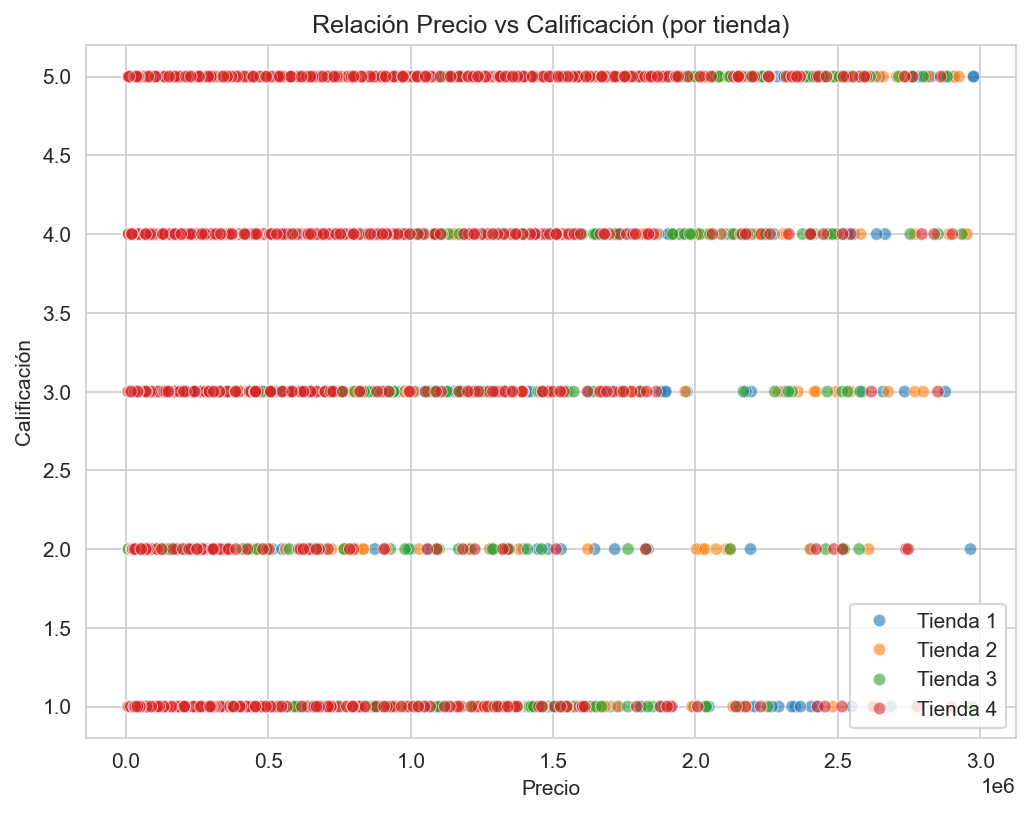

### ingresos_mensuales.png

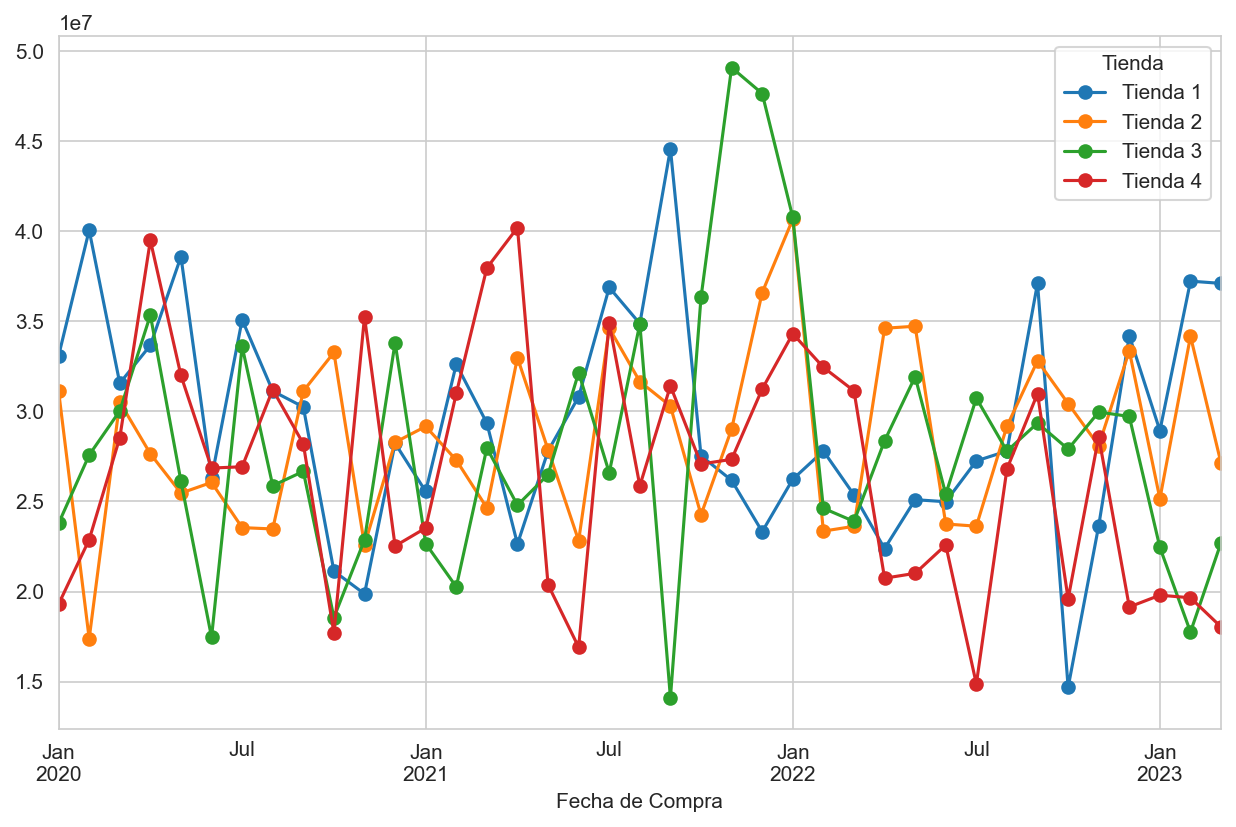

- **No encontrado:** evolucion_acumulada.png

**Descarga ZIP:** `graficos_tiendas_pngs.zip`

In [21]:
# Mostrar PNGs generados y ofrecer descarga desde el notebook
from IPython.display import Image, display, Markdown
import os

png_files = [
    'ingresos_totales.png',
    'ingresos_distribucion_pie.png',
    'top5_categorias.png',
    'precio_vs_calificacion.png',
    'ingresos_mensuales.png',
    'evolucion_acumulada.png'
]

for p in png_files:
    if os.path.exists(p):
        display(Markdown(f"### {p}"))
        display(Image(filename=p, width=800))
    else:
        display(Markdown(f"- **No encontrado:** {p}"))

# También mostrar un ZIP con todos los PNGs para descargar
import zipfile
zip_name = 'graficos_tiendas_pngs.zip'
with zipfile.ZipFile(zip_name, 'w') as z:
    for p in png_files:
        if os.path.exists(p):
            z.write(p)

if os.path.exists(zip_name):
    display(Markdown(f"**Descarga ZIP:** `{zip_name}`"))
else:
    display(Markdown("No se generó ZIP - no hay PNGs disponibles."))

In [1]:
# Generar ZIP final con todos los artefactos listos para subir a GitHub
import os
import zipfile
from IPython.display import FileLink, Markdown, display

files_to_package = [
    'ingresos_totales.png',
    'ingresos_distribucion_pie.png',
    'top5_categorias.png',
    'precio_vs_calificacion.png',
    'ingresos_mensuales.png',
    'graficos_tiendas_pngs.zip',
    'resumen_metrics_tiendas.csv',
    'informe_final_sr_juan.md',
    'AluraStoreLatam.ipynb'
]

existing = [f for f in files_to_package if os.path.exists(f)]
zip_name = 'alura_store_exports.zip'

if not existing:
    print('No se encontraron archivos para empaquetar. Asegúrate de ejecutar las celdas previas.')
else:
    with zipfile.ZipFile(zip_name, 'w', compression=zipfile.ZIP_DEFLATED) as z:
        for f in existing:
            z.write(f, arcname=os.path.basename(f))
    size = os.path.getsize(zip_name)
    display(Markdown(f"**ZIP generado:** `{zip_name}` — {size/1024:.1f} KB"))
    display(FileLink(zip_name))
    print('\nArchivos incluidos:')
    for f in existing:
        print('-', f)


**ZIP generado:** `alura_store_exports.zip` — 2026.1 KB

c:\Users\jhurtado\OneDrive - REZEPKA DESARROLLO INMOBILIARIO LIMITADA\Oracle ONE\Challenge-Alura-Store\alura_store_exports.zip


Archivos incluidos:
- ingresos_totales.png
- ingresos_distribucion_pie.png
- top5_categorias.png
- precio_vs_calificacion.png
- ingresos_mensuales.png
- graficos_tiendas_pngs.zip
- resumen_metrics_tiendas.csv
- informe_final_sr_juan.md
- AluraStoreLatam.ipynb
